In [3]:
import pandas as pd

In [4]:
data=pd.read_csv("EPL_set.csv")
print(data.head(10))

  Div      Date          HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  \
0  E0  14/08/93           Arsenal        Coventry     0     3   A   NaN   NaN   
1  E0  14/08/93       Aston Villa             QPR     4     1   H   NaN   NaN   
2  E0  14/08/93           Chelsea       Blackburn     1     2   A   NaN   NaN   
3  E0  14/08/93         Liverpool  Sheffield Weds     2     0   H   NaN   NaN   
4  E0  14/08/93          Man City           Leeds     1     1   D   NaN   NaN   
5  E0  14/08/93         Newcastle       Tottenham     0     1   A   NaN   NaN   
6  E0  14/08/93            Oldham         Ipswich     0     3   A   NaN   NaN   
7  E0  14/08/93  Sheffield United         Swindon     3     1   H   NaN   NaN   
8  E0  14/08/93       Southampton         Everton     0     2   A   NaN   NaN   
9  E0  14/08/93          West Ham       Wimbledon     0     2   A   NaN   NaN   

   HTR   Season  
0  NaN  1993-94  
1  NaN  1993-94  
2  NaN  1993-94  
3  NaN  1993-94  
4  NaN  1993-94  


#### All the clubs that played in EPl between 1993 et 2018 ?

In [5]:
print("the number of teams that played in EPl between 1994 et 2018 est "+str(data['HomeTeam'].nunique())+"\n")
print(data['HomeTeam'].unique())

the number of teams that played in EPl between 1994 et 2018 est 50

['Arsenal' 'Aston Villa' 'Chelsea' 'Liverpool' 'Man City' 'Newcastle'
 'Oldham' 'Sheffield United' 'Southampton' 'West Ham' 'Norwich'
 'Tottenham' 'Everton' 'Ipswich' 'Leeds' 'Wimbledon' 'Blackburn'
 'Coventry' 'Man United' 'QPR' 'Sheffield Weds' 'Swindon' 'Crystal Palace'
 'Leicester' "Nott'm Forest" 'Bolton' 'Middlesbrough' 'Derby' 'Sunderland'
 'Barnsley' 'Charlton' 'Watford' 'Bradford' 'Fulham' 'Birmingham'
 'Middlesboro' 'West Brom' 'Portsmouth' 'Wolves' 'Wigan' 'Reading' 'Hull'
 'Stoke' 'Burnley' 'Blackpool' 'Swansea' 'Cardiff' 'Bournemouth'
 'Brighton' 'Huddersfield']


#### Number of goals scored in EPL between 1993 et 2018 and in every season ?

In [6]:
print("Number of goals scored in EPl all time is "+str(data.FTHG.sum()+data.FTAG.sum()))
data['goals scored']=data.FTHG+data.FTAG
print(data.groupby('Season')['goals scored'].sum())
data.drop(columns='goals scored',inplace=True)


Number of goals scored in EPl all time is 25565
Season
1993-94    1195
1994-95    1195
1995-96     988
1996-97     970
1997-98    1019
1998-99     959
1999-00    1060
2000-01     992
2001-02    1001
2002-03    1000
2003-04    1012
2004-05     975
2005-06     944
2006-07     931
2007-08    1002
2008-09     942
2009-10    1053
2010-11    1063
2011-12    1066
2012-13    1063
2013-14    1052
2014-15     975
2015-16    1026
2016-17    1064
2017-18    1018
Name: goals scored, dtype: int64


### The ranking table in every season ?

In [7]:
def points(row):
    if row['FTHG'] == row['FTAG']:
        val = 1
    elif row['FTHG'] > row['FTAG']:
        val = 3
    else:
        val = 0
    return val
def A_points(row):
    if row['FTAG'] == row['FTHG']:
        val = 1
    elif row['FTAG'] > row['FTHG']:
        val = 3
    else:
        val = 0
    return val

data['home_points']=data.apply(points,axis=1)
data['away_points']=data.apply(A_points,axis=1)


def rank_table(season,data):
    home_table=data[data.Season==season].groupby('HomeTeam').home_points.sum().rename("H_points")
    away_table=data[data.Season==season].groupby('AwayTeam').away_points.sum().rename("A_points")
    home_table_goals=data[data.Season==season].groupby('HomeTeam').FTHG.sum().rename("H_goals_scored")
    away_table_goals=data[data.Season==season].groupby('AwayTeam').FTAG.sum().rename("A_goals_scored")
    home_table_goals_2=data[data.Season==season].groupby('HomeTeam').FTAG.sum().rename("H_goals_conceded")
    away_table_goals_2=data[data.Season==season].groupby('AwayTeam').FTHG.sum().rename("A_goals_conceded ")
    table=pd.concat([home_table,away_table,home_table_goals,away_table_goals,home_table_goals_2,away_table_goals_2],axis=1)
    table['GF']=table['H_goals_scored']+table['A_goals_scored']
    table['GA']=table['H_goals_conceded'] +table["A_goals_conceded "]
    table['GD']=table['GF']-table['GA']
    table['points']=table['H_points']+table['A_points']
    table.drop(columns=["H_goals_scored","A_goals_scored","H_goals_conceded","A_goals_conceded "],inplace=True)
    table = table.sort_values('points',ascending=False)
    return table
season=input("entrez la season :")
rank_table(season,data)

entrez la season :2017-18


,H_points,A_points,GF,GA,GD,points
Man City,50,50,106,27,79,100
Man United,47,34,68,28,40,81
Tottenham,43,34,74,36,38,77
Liverpool,43,32,84,38,46,75
Chelsea,37,33,62,38,24,70
Arsenal,47,16,74,51,23,63
Burnley,26,28,36,39,-3,54
Everton,34,15,44,58,-14,49
Leicester,27,20,56,60,-4,47
Crystal Palace,26,18,45,55,-10,44


### Ranking Table between two years ?

In [8]:
begin=int(input("entrez l'anne de debut"))
end=int(input("entrez l'anne de fin"))
season=[str(x)+"-"+str(x%100+1) for x in range(begin,end)]
home_table=data[data.Season.isin(season)].groupby('HomeTeam').home_points.sum().rename("H_points")
away_table=data[data.Season.isin(season)].groupby('AwayTeam').away_points.sum().rename("A_points")
home_table_goals=data[data.Season.isin(season)].groupby('HomeTeam').FTHG.sum().rename("H_goals_scored")
away_table_goals=data[data.Season.isin(season)].groupby('AwayTeam').FTAG.sum().rename("A_goals_scored")
home_table_goals_2=data[data.Season.isin(season)].groupby('HomeTeam').FTAG.sum().rename("H_goals_conceded")
away_table_goals_2=data[data.Season.isin(season)].groupby('AwayTeam').FTHG.sum().rename("A_goals_conceded ")
table=pd.concat([home_table,away_table,home_table_goals,away_table_goals,home_table_goals_2,away_table_goals_2],axis=1)

table['GF']=table['H_goals_scored']+table['A_goals_scored']
table['GA']=table['H_goals_conceded'] +table["A_goals_conceded "]
table['GD']=table['GF']-table['GA']
table['points']=table['H_points']+table['A_points']
table.drop(columns=["H_goals_scored","A_goals_scored","H_goals_conceded","A_goals_conceded "],inplace=True)
table = table.sort_values('points',ascending=False)
table

entrez l'anne de debut2016
entrez l'anne de fin2018


,H_points,A_points,GF,GA,GD,points
Man City,90,88,186,66,120,178
Tottenham,96,67,160,62,98,163
Chelsea,88,75,147,71,76,163
Liverpool,84,67,162,80,82,151
Man United,81,69,122,57,65,150
Arsenal,92,46,151,95,56,138
Everton,77,33,106,102,4,110
Burnley,59,35,75,94,-19,94
Leicester,61,30,104,123,-19,91
Bournemouth,57,33,100,128,-28,90


### Team points in each year ?

ValueError: No axis named 1993-94 for object type <class 'pandas.core.frame.DataFrame'>

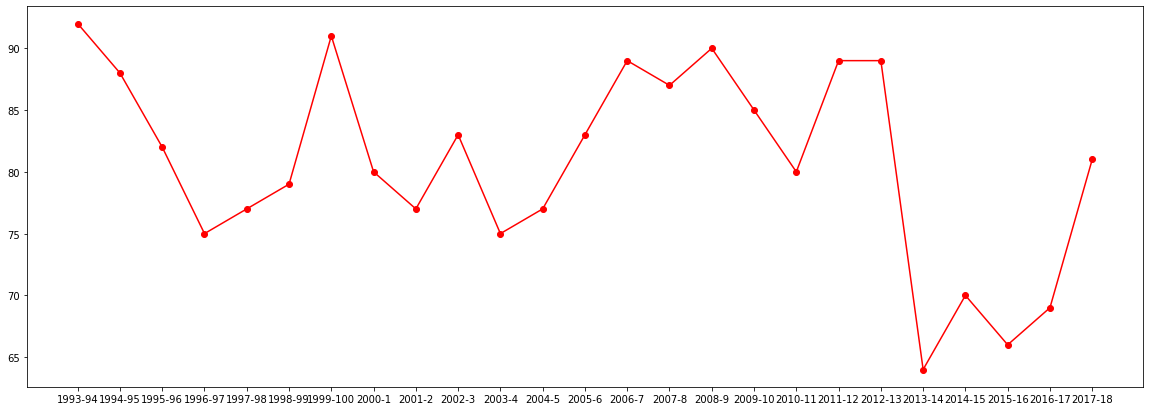

In [12]:
def team_points_each_year(team):
    seasons=[str(x)+"-"+str(x%100+1) for x in range(1993,2018)]
    home_table=data[(data.HomeTeam==team)].groupby(data.Season).home_points.sum().rename("H_points")
    away_table=data[(data.AwayTeam==team) ].groupby(data.Season).away_points.sum().rename("A_points")
    table=pd.concat([home_table,away_table],axis=1)
    table['points']=table['H_points']+table['A_points']
    table.drop(columns=["H_points","A_points"],inplace=True)
    return table
team1=team_points_each_year("Man United")
team2=team_points_each_year("Man City")
import matplotlib.pyplot as plt
x_values = [str(x)+"-"+str(x%100+1) for x in range(1993,2018)]
plt.figure(figsize=(20, 7))
plt.plot(x_values,team1.points,color='red',marker='o')
y_values=[]
for x in x_values:
    if (not team2.loc(x)):
        y_values.add(0)
    else:
        y_values.add(team2.loc(x).points)
print(y_values)


print(team2)
#plt.plot (x_values,team2.points,color='#82edc9',marker= '*')
plt.show()